In [164]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [158]:
math_data = pd.read_csv('student-mat.csv') #importing data
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [132]:
y = math_data.G3 # using G3 as the predicted variable
x = math_data.drop(['G1', 'G2', 'G3', 'school', 'address'], axis=1)


In [202]:
#Identify target variable y and predictor variables X.
ym = math_data['G3']
Xm = math_data[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences']]
#Convert dummy variables values into 0/1.
Xm.school = Xm['school'].replace(['GP', 'MS'], [1,0])
Xm.sex = Xm['sex'].replace(['F','M'],[1,0])
Xm.address = Xm['address'].replace(['U','R'], [1,0])
Xm.famsize = Xm['famsize'].replace(['LE3','GT3'], [1,0])
Xm.Pstatus = Xm['Pstatus'].replace(['T','A'], [1,0])
Xm.schoolsup = Xm['schoolsup'].replace(['yes','no'],[1,0])
Xm.famsup = Xm['famsup'].replace(['yes','no'],[1,0])
Xm.activities = Xm['activities'].replace(['yes','no'],[1,0])
Xm.nursery = Xm['nursery'].replace(['yes','no'],[1,0])
Xm.higher = Xm['higher'].replace(['yes','no'],[1,0])
Xm.internet = Xm['internet'].replace(['yes','no'],[1,0])
Xm.romantic = Xm['romantic'].replace(['yes','no'],[1,0])
#Identify nominal variables
norminal_vars = ['Fjob', 'Mjob', 'reason','guardian']
#Convert norminal variables to dummy variables
Xm = pd.get_dummies(Xm, columns= norminal_vars, drop_first=True)
# Split data into training and test data sets.
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.3, random_state=42)

C:\Users\Jagrutee\Anaconda3_1\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [161]:
Xm_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other'],
      dtype='object')

In [166]:
#data transform
def scale (X):
    ### non scaled dataframe X --> scaled dataframe X
    #seperate dummy varialbes and nondummy variables for X_train and X_test
    X_nondummy = X[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime']]
    X_dummy = X[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']]
    #select scaler
    scaler = MinMaxScaler()
    #scale nondummy variables
    scaler.fit(X_nondummy)
    X_nondummy_scaled = scaler.transform(X_nondummy)
    #concatenate scaled nondummy with nonscaled dummy variables
    X_scaled = np.concatenate((X_nondummy_scaled, X_dummy.values), axis=1)
    return X_scaled
#Apply to Xm_train, Xm_test, Xp_train, Xp_test
Xm_train_scaled = scale(Xm_train)
Xm_test_scaled = scale(Xm_test)

# Linear Regression

In [167]:
from  sklearn.linear_model  import LinearRegression
regressor = LinearRegression()
regressor.fit(Xm_train_scaled, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
ypredict=regressor.predict(Xm_test_scaled)
ypredict

array([ 2.34691144,  7.17676068,  8.33585756, 11.58926499,  9.95696805,
        9.72529008, 13.2622096 , 13.30306763,  9.91712015, 13.07501891,
       11.90651574,  9.67881388, 11.4682005 , 13.83331391, 11.15968286,
       10.36110809,  8.9050925 ,  9.00348067, 10.08668732,  8.95290653,
       11.54887844, 14.14462166, 11.85797606, 10.91682971, 11.40145251,
       14.47777532, 11.36570678, 13.88718357, 12.95115343, 15.15584325,
       11.23165389, 10.90739554, 13.86744598,  9.87072456,  9.0142301 ,
       10.44012076,  6.32137088, 11.74584989, 12.55029608,  7.98986753,
        4.36257533, 10.38526628, 10.55949327,  8.82935652, 11.11611333,
       10.13317578, 11.40023772,  9.2284319 ,  9.5087628 , 13.6085457 ,
       10.1705821 , 13.70772955, 14.60955872, 11.46560151,  8.71484285,
        8.29541301, 12.16583764,  8.73890606, 13.63291542, 13.78429237,
       14.66092665, 12.83805425,  0.76101747, 11.82546984,  7.80602683,
        9.34369701,  9.61596896, 11.50749518,  8.83032123, 14.73

In [181]:
Xm_test_scaled.shape

(119, 36)

In [189]:
ypredict.shape

(119,)

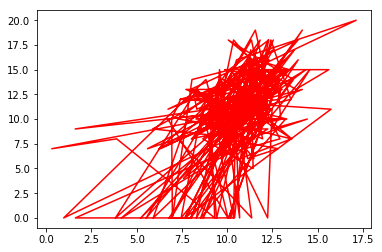

In [177]:
plt.plot(regressor.predict(Xm_train_scaled), ym_train, color='red')

In [229]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ym_test, ypredict)
print ("The mean squared error is:",  mse)

The mean squared error is: 17.42976067057317


In [236]:
from sklearn.linear_model import SGDRegressor #using gradient descent for logistic regression
clf = SGDRegressor()
clf.fit(Xm_train, ym_train)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=0, warm_start=False)

C:\Users\Jagrutee\Anaconda3_1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [237]:
ypredict2=regressor.predict(Xm_test_scaled)
ypredict2

array([ 2.34691144,  7.17676068,  8.33585756, 11.58926499,  9.95696805,
        9.72529008, 13.2622096 , 13.30306763,  9.91712015, 13.07501891,
       11.90651574,  9.67881388, 11.4682005 , 13.83331391, 11.15968286,
       10.36110809,  8.9050925 ,  9.00348067, 10.08668732,  8.95290653,
       11.54887844, 14.14462166, 11.85797606, 10.91682971, 11.40145251,
       14.47777532, 11.36570678, 13.88718357, 12.95115343, 15.15584325,
       11.23165389, 10.90739554, 13.86744598,  9.87072456,  9.0142301 ,
       10.44012076,  6.32137088, 11.74584989, 12.55029608,  7.98986753,
        4.36257533, 10.38526628, 10.55949327,  8.82935652, 11.11611333,
       10.13317578, 11.40023772,  9.2284319 ,  9.5087628 , 13.6085457 ,
       10.1705821 , 13.70772955, 14.60955872, 11.46560151,  8.71484285,
        8.29541301, 12.16583764,  8.73890606, 13.63291542, 13.78429237,
       14.66092665, 12.83805425,  0.76101747, 11.82546984,  7.80602683,
        9.34369701,  9.61596896, 11.50749518,  8.83032123, 14.73

In [239]:
mse1 = mean_squared_error(ym_test, ypredict2)
print ("The mean squared error using gradient descent is:",  mse1)

The mean squared error using gradient descent is: 17.42976067057317


In [240]:
from sklearn.linear_model import SGDRegressor #using gradient descent for logistic regression
clf = SGDRegressor()
clf.fit(Xm_train, ym_train)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=0, warm_start=False)

C:\Users\Jagrutee\Anaconda3_1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [241]:
ypredict3=regressor.predict(Xm_test_scaled)
ypredict3

array([ 2.34691144,  7.17676068,  8.33585756, 11.58926499,  9.95696805,
        9.72529008, 13.2622096 , 13.30306763,  9.91712015, 13.07501891,
       11.90651574,  9.67881388, 11.4682005 , 13.83331391, 11.15968286,
       10.36110809,  8.9050925 ,  9.00348067, 10.08668732,  8.95290653,
       11.54887844, 14.14462166, 11.85797606, 10.91682971, 11.40145251,
       14.47777532, 11.36570678, 13.88718357, 12.95115343, 15.15584325,
       11.23165389, 10.90739554, 13.86744598,  9.87072456,  9.0142301 ,
       10.44012076,  6.32137088, 11.74584989, 12.55029608,  7.98986753,
        4.36257533, 10.38526628, 10.55949327,  8.82935652, 11.11611333,
       10.13317578, 11.40023772,  9.2284319 ,  9.5087628 , 13.6085457 ,
       10.1705821 , 13.70772955, 14.60955872, 11.46560151,  8.71484285,
        8.29541301, 12.16583764,  8.73890606, 13.63291542, 13.78429237,
       14.66092665, 12.83805425,  0.76101747, 11.82546984,  7.80602683,
        9.34369701,  9.61596896, 11.50749518,  8.83032123, 14.73

In [242]:
mse2 = mean_squared_error(ym_test, ypredict3)
print ("The mean squared error using gradient descent is:",  mse2)

The mean squared error using gradient descent is: 17.42976067057317


The mean square error for different learning rates for gradient descent is approx 17.43 and is same for multiple regression.

# Logistic Regression / Classification

In [216]:
gradenew = np.where(math_data['G3'] <= 10, 0, 1)
gradenew

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [217]:
X_train, X_test, y_train, y_test = train_test_split(Xm, gradenew, test_size = 0.3, random_state=42)

In [218]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [220]:
from  sklearn.linear_model  import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [221]:
ypredict1=classifier.predict(X_test_scaled)
ypredict1

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1])

In [223]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypredict1)
cm

array([[34, 29],
       [10, 46]], dtype=int64)

In [226]:
accuracy = (80/119)*100
accuracy

67.22689075630252

In [230]:
from sklearn.linear_model import SGDClassifier #using gradient descent for logistic regression
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

C:\Users\Jagrutee\Anaconda3_1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [232]:
ypredict2 = clf.predict(X_test_scaled)

In [233]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, ypredict2)
cm1

array([[60,  3],
       [55,  1]], dtype=int64)

In [234]:
accuracy = (61/119)*100
accuracy

51.26050420168067